In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<IPython.core.display.Javascript object>


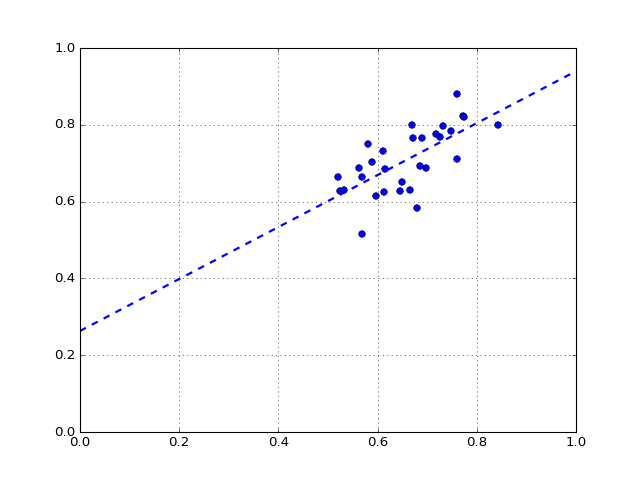

8

In [3]:
def button_press_callback(event):
    # Get the toolbar and make sure that we are not in zoom or pan mode. 
    # If we are, just exit without doing anything
    toolbar = plt.get_current_fig_manager().toolbar
    if toolbar.mode != "":
        pass
    elif event.button == 1:
        plot_random_points(event.xdata, event.ydata, 10)
        
def key_press_callback(event):
    if event.key.lower() == 'r':
        plot_regression_line()
    
def plot_random_points(x, y, n=10):
    sigma = 0.05
    xs = sigma * np.random.randn(n) + x
    ys = sigma * np.random.randn(n) + y
    plt.plot(xs, ys, 'bo')

def plot_regression_line():
    ax = plt.gca()
    xs = [x for l in ax.lines for x in l.get_xdata()]
    ys = [y for l in ax.lines for y in l.get_ydata()]
    m, b = np.polyfit(xs, ys, 1)
    xs = np.linspace(*plt.xlim(), num=2)
    plt.plot(xs, m*xs+b, '--')
   
ax = plt.gca()
ax.grid('on')
# If we don't turn this off, the graph will go nuts scaling 
# itself with the first couple of points chosen.
ax.set_autoscale_on(False)

# Connect the event listeners to the 
plt.gcf().canvas.mpl_connect('button_press_event', button_press_callback)
plt.gcf().canvas.mpl_connect('key_press_event', key_press_callback)